In [4]:
import numpy as np
import matplotlib.pyplot as plt

1 to 0
4 to 1
8 to 2
7 to 3
6 to 4
9 to 5
3 to 6
2 to 7
5 to 8
0 to 9


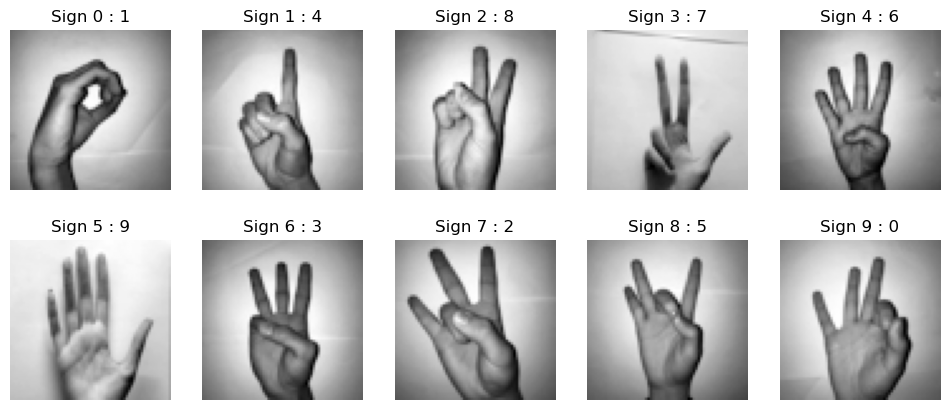

In [20]:
x_load = np.load('X.npy')
y_load = np.load('Y.npy')
img_size = 64

fig, axs = plt.subplots(2,5, figsize=(12,5))
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each, ax in enumerate(axs.flat):
    ax.imshow(x_load[image_index_list[each]], cmap="gray",)
    ax.axis('off')
    title = "Sign " + str(each)  + " : " + str(y_load[image_index_list[each]].argmax())
    ax.set_title(title)
    print(f"{str(y_load[image_index_list[each]].argmax())} to {str(each)}")
plt.show()

In [6]:
# np.save('X_test.npy', x_load[image_index_list])
x_test_laod = np.load('X_test.npy')
fig, axs = plt.subplots(2,5, figsize=(12,5))

for each, ax in enumerate(axs.flat):
    ax.imshow(x_test_laod[each], cmap="gray",)
    ax.axis('off')
    title = "Sign " + str(each) 
    ax.set_title(title)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'X_test.npy'

In [9]:
print(y_load.shape)
print(y_load)

(2062, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
y_labels = np.argmax(y_load, axis=1)

In [11]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

x_load = x_load.astype("float32")
if x_load.ndim == 3:
    x_load = np.expand_dims(x_load, -1)
if x_load.max() > 1.0:
    x_load /= 255.0

X_train, X_test, y_train, y_test = train_test_split(
    x_load, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)
X_train = torch.LongTensor(X_train)
X_test = torch.LongTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

NUM_CLASSES = 10
y_train_categorical = nn.functional.one_hot(y_train, NUM_CLASSES)
y_test_categorical  = nn.functional.one_hot(y_test,  NUM_CLASSES)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

aug_preview = keras.Sequential(
    [
        layers.RandomRotation(0.15, fill_mode="nearest"),
        layers.RandomTranslation(0.15, 0.15, fill_mode="nearest"),
        layers.RandomZoom(0.15, fill_mode="nearest"),
        layers.RandomContrast(0.2),
    ],
    name="aug_preview",
)

aug_sample = aug_preview(X_train, training=True)

2025-12-14 00:07:13.087586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-14 00:07:14.762788: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
aug_sample.dtype

tf.float32

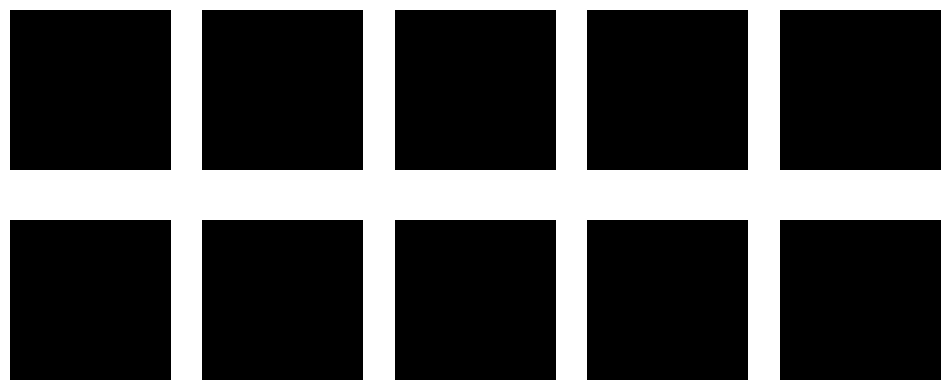

In [14]:
image_index_list = list(range(0,len(aug_sample), len(aug_sample)//10))

fig, axs = plt.subplots(2,5, figsize=(12,5))
for each, ax in enumerate(axs.flat):
    ax.imshow(np.squeeze(aug_sample[image_index_list[each]]), cmap="gray")
    ax.axis('off')
plt.show()

In [15]:
print("NUM_CLASSES:", NUM_CLASSES)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

INPUT_SHAPE = (64, 64, 1)
augmentation = keras.Sequential([
    layers.RandomRotation(0.10, fill_mode="nearest"),
    layers.RandomTranslation(0.10, 0.10, fill_mode="nearest"),
    layers.RandomZoom(0.10, fill_mode="nearest"),
    layers.RandomContrast(0.15),
], name="augmentation")

inputs = keras.Input(shape=INPUT_SHAPE)

NUM_CLASSES: 10
Train shape: torch.Size([1649, 64, 64, 1]) Test shape: torch.Size([413, 64, 64, 1])


In [16]:
X_train.dtype

torch.int64

In [ ]:

model = Sequential()

for i in range(3):
    # Block 1
    if i == 0:
        model.add(Conv2D(32*2**i,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
    else:
        model.add(Conv2D(32*2**i,3,activation='relu',padding='same'))

    model.add(Conv2D(32*2**i,3,activation='relu',padding='same'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(padding='same'))
    model.add(Dropout(0.2+0.1*i))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))

model.summary()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

x_load = np.load('X.npy')
y_load = np.load('Y.npy')

y_labels = np.argmax(y_load, axis=1)

from sklearn.model_selection import train_test_split

x_load = x_load.astype("float32")
if x_load.ndim == 3:
    x_load = np.expand_dims(x_load, -1)
if x_load.max() > 1.0:
    x_load /= 255.0

X_train, X_test, y_train, y_test = train_test_split(
    x_load, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

NUM_CLASSES = 10
y_train_categorical = to_categorical(y_train, NUM_CLASSES)
y_test_categorical  = to_categorical(y_test,  NUM_CLASSES)


INPUT_SHAPE = (64, 64, 1)
augmentation = keras.Sequential([
    layers.RandomRotation(0.10, fill_mode="nearest"),
    layers.RandomTranslation(0.10, 0.10, fill_mode="nearest"),
    layers.RandomZoom(0.10, fill_mode="nearest"),
    layers.RandomContrast(0.15),
], name="augmentation")

inputs = keras.Input(shape=INPUT_SHAPE)

In [33]:
x = augmentation(X_test)
x_load.shape

(2062, 64, 64, 1)

In [ ]:
import pytest
import numpy as np
import base64
from pydantic import BaseModel
from keras import models


import matplotlib.pyplot as plt 

class PredictionResponse(BaseModel):
    image_base64: str
    label: int
    score: float

IMAGE_SIZE = 64

def preprocess(image):
    """Предобработка изображения"""


    if isinstance(image, str):
        image = Image.open(io.BytesIO(image))
    if not isinstance(image, np.ndarray):
        if image.mode != 'L':
            image = image.convert('L')

    TARGET_SIZE = (IMAGE_SIZE, IMAGE_SIZE)
    if image.shape != TARGET_SIZE:
        image = image.resize(TARGET_SIZE, Image.Resampling.LANCZOS)
    image_array = np.array(image) 
    if image_array.ndim == 2:
        image_array = np.expand_dims(image_array, axis=-1)
    if image_array.max() > 1:
        image_array = image_array.astype(np.float32) / 255.0
    image_array = np.expand_dims(image_array, axis=0)


    return image_array

def load_model():
    """Load a pre-trained Sign Language Digits model."""

    model_hf = 

    return model_hf

def test_load_model():
    model = load_model()
    assert model is not None

def load_test_images():
    test_images = np.load("/home/shamighoul/Документы/техно разраб сервиса/service/tests/test_images.npy")
    image_list = [(image, i) for i, image in enumerate(test_images)]

    return image_list


@pytest.fixture(scope="function")
def model():
    # Load the model once for each test function
    return load_model()


@pytest.mark.parametrize(
    "image, expected_label", 
    load_test_images()
)
def test_digit(model, image, expected_label: int):
    image = preprocess(image)
    model_pred = model.predict(image)
    print(model_pred)
    image_base64 = str(base64.b64encode(image).decode('utf-8'))
        
    result  = PredictionResponse(
        image_base64=image_base64,
        label=int(model_pred.argmax()),
        score=float(model_pred.max())
        )
    
    assert isinstance(result, PredictionResponse)
    assert result.label == expected_label


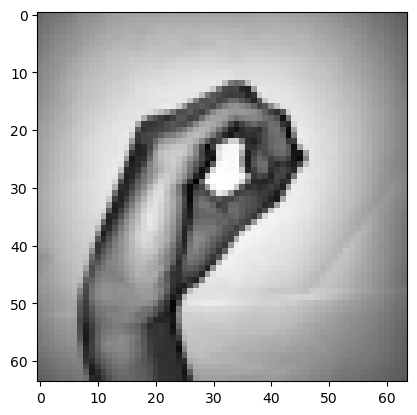

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[2.25328289e-08 9.99999166e-01 6.54184928e-09 1.28817454e-08
  8.49592652e-07 3.57342387e-08 5.07661913e-09 1.07106091e-09
  1.57788307e-08 8.79078943e-09]]
0.99999917 1
0


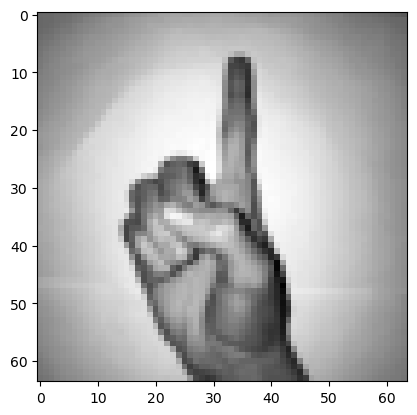

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.84452329e-08 1.38468085e-05 7.08279742e-07 2.91065039e-08
  9.99580801e-01 1.49699781e-06 4.23819146e-10 4.76739302e-07
  4.02635720e-04 1.42249290e-09]]
0.9995808 4
1


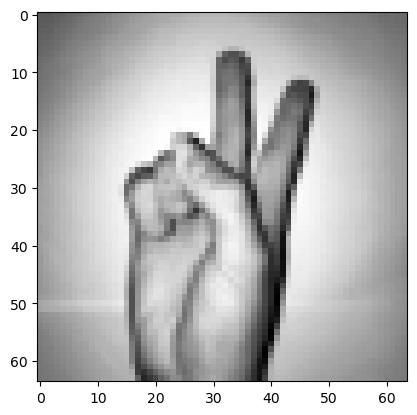

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.5531644e-04 8.2498193e-03 8.7120375e-03 1.4266075e-02 3.1187880e-01
  1.4738343e-04 2.0958119e-04 1.9832042e-03 6.5428269e-01 1.5059812e-05]]
0.6542827 8
2


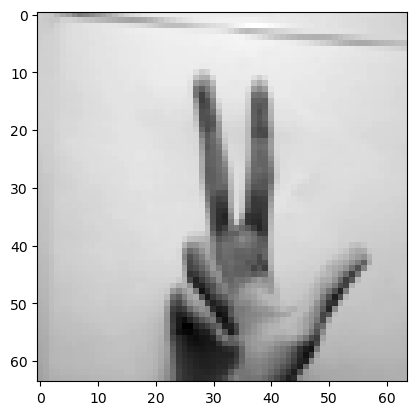

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[6.6675479e-04 3.8824222e-04 3.0356790e-03 1.1799675e-02 4.4123065e-03
  5.1907602e-05 1.3151180e-04 8.0197591e-01 1.7639484e-01 1.1431294e-03]]
0.8019759 7
3


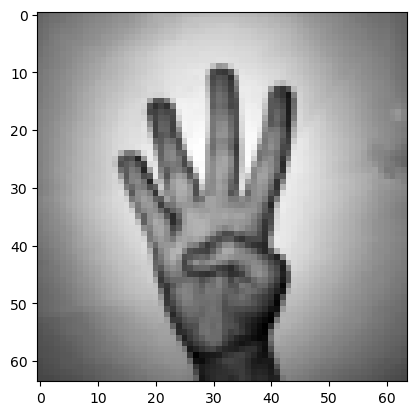

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.9934572e-05 1.6706811e-07 3.5828719e-04 1.5810944e-02 3.8832530e-07
  4.2445768e-06 9.8378479e-01 1.8591282e-07 6.8631734e-06 4.1536205e-06]]
0.9837848 6
4


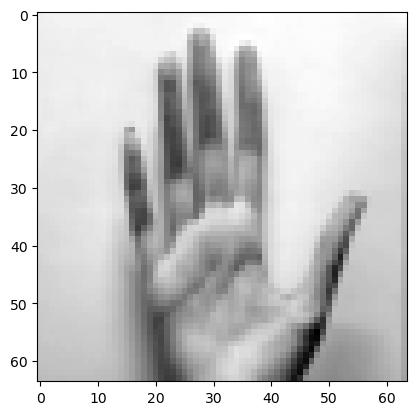

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5.6319986e-03 6.8859044e-05 7.2816744e-07 9.8810533e-06 5.9195190e-07
  6.8602790e-06 3.9131702e-03 3.6969400e-04 1.6841818e-07 9.8999804e-01]]
0.98999804 9
5


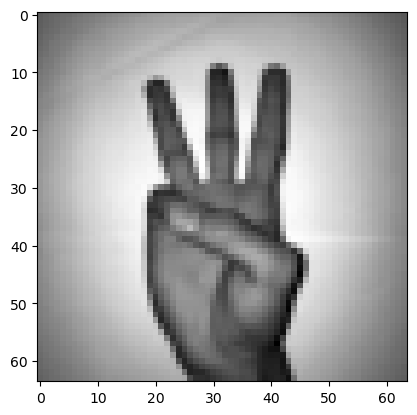

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[4.9368973e-05 1.2489677e-06 1.1315931e-04 9.9693942e-01 6.8863471e-07
  5.4714206e-07 1.7142578e-04 4.2560196e-06 2.7195050e-03 4.1839965e-07]]
0.9969394 3
6


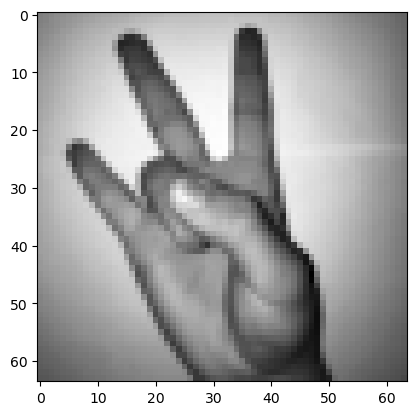

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[2.7947820e-04 9.6427240e-05 8.7016118e-01 9.1848755e-03 5.5723009e-03
  5.9774693e-02 7.3189498e-03 5.5131070e-05 4.7539406e-02 1.7561440e-05]]
0.8701612 2
7


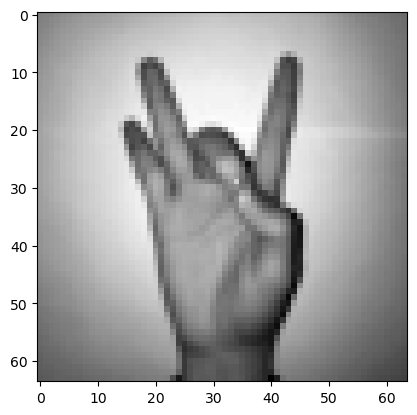

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[6.1026942e-03 1.9882363e-04 9.4263908e-04 1.3151018e-04 8.8555617e-03
  9.8338336e-01 3.3884894e-04 9.1368629e-06 2.5210707e-05 1.2226963e-05]]
0.98338336 5
8


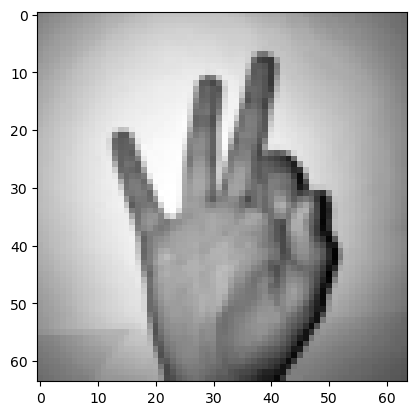

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.9953699e-01 8.1796891e-08 2.1413564e-06 4.7677159e-07 6.1402989e-07
  4.2731423e-04 3.1944255e-05 3.4340619e-08 1.6763245e-08 4.7391205e-07]]
0.999537 0
9


In [16]:
test_images = np.load("/home/shamighoul/Документы/техно разраб сервиса/service/tests/test_images.npy")
model = models.load_model("/home/shamighoul/Документы/техно разраб сервиса/service/ml/checkpoint0050.model.keras")

for i, image in enumerate(test_images):
    plt.imshow(np.squeeze(image), cmap="gray")
    plt.show()
    image = preprocess(image)
    model_pred = model.predict(image)
    print(model_pred)
    print(model_pred.max(), model_pred.argmax())
    print(i)
